# Упражнения
В этом упражнении рассматривается прогноз SARIMA, аналогичный тому, который был сделан для набора данных $CO_2$.



In [ ]:
!pip install pmdarima

In [1]:
# 
import pandas as pd
import numpy as np
%matplotlib inline

# импорт SARIMAX 
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # для определения (p,q) 
from statsmodels.tsa.seasonal import seasonal_decompose      # для ETS графиков
from pmdarima import auto_arima                              # для поиска ARIMA моделей

# метрики
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# для игнорирования предупреждений (опционально)
# import warnings
# warnings.filterwarnings("ignore")

# Загрузка датасета
df = pd.read_csv('./HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


В <tt>df</tt>  348 записей и 1 колонка. Данные представляют собой численность сотрудников в тысячах человек в среднем за месяц с января 1990 года по декабрь 2018 года.

### 1. Постройте график временного ряда


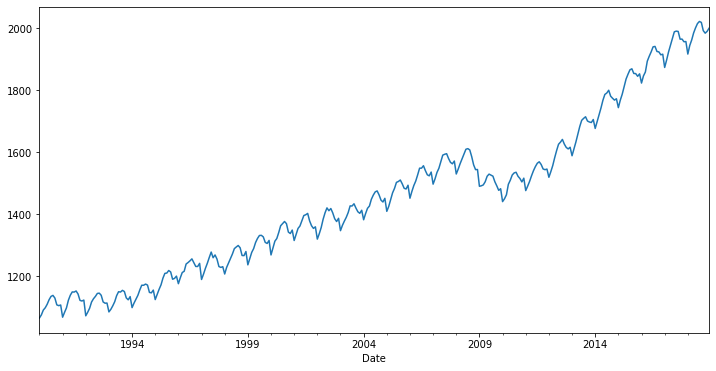

In [3]:
## Постройте график атрибута 'Employees'



<AxesSubplot:xlabel='Date'>

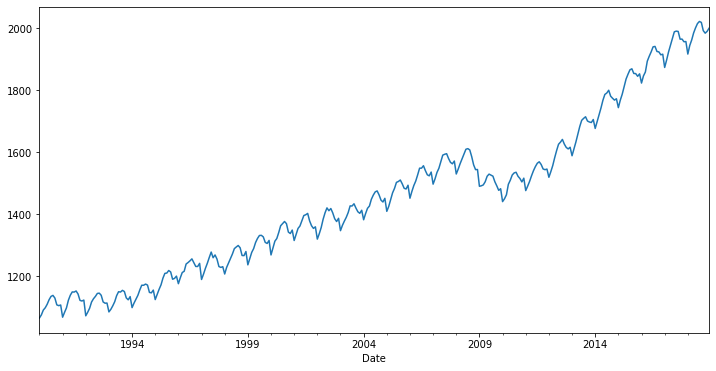

In [9]:
#мой код
df.Employees.plot(figsize=(12,6))

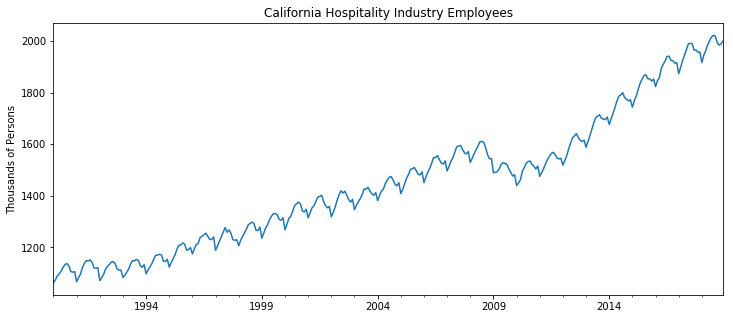

In [2]:
# добавьте заголовок и подписи

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

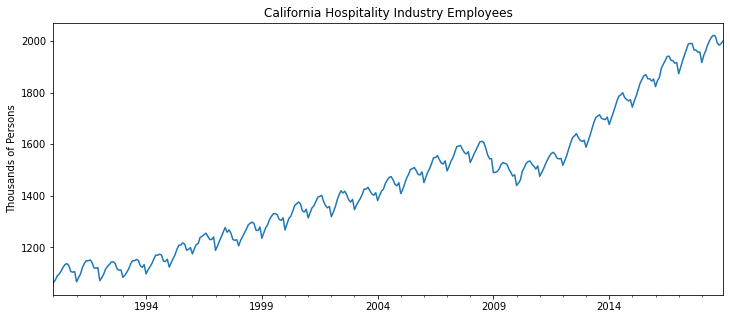

In [15]:
#мой код
title = 'California Hospitality Industry Employees'
yl = 'Thousands of Persons'
xl = ''

pl = df.Employees.plot(figsize=(12,5), title=title)
pl.set(xlabel=xl, ylabel=yl)

### 2. Выполните ETS декомпозицию
Используя аддитивную модель ('additive').
Подсказка: функция seasonal_decompose

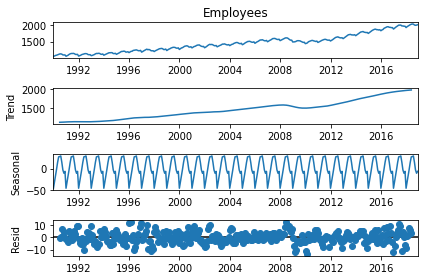

In [23]:
#мой код
results = seasonal_decompose(df.Employees, model='additive')
results.plot();

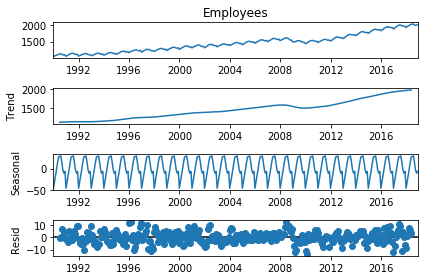

In [11]:
# отобразите результат


### 3. Запустите <tt>pmdarima.auto_arima</tt> чтобы получить набор параметров
Это может занять некоторое время, так как необходимо оценить множество комбинаций.

In [ ]:
# Подсказка: используйте auto_arima

In [24]:
auto_arima(df.Employees, seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 06 Mar 2022   AIC                           2208.504
Time:                                      18:34:21   BIC                           2231.600
Sample:                                           0   HQIC                          2217.700
                                              - 348                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.520      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.571      0.000      -1.080      -0.808
ma.L2          0.1288      0.060      2.164      0.030       0.012       0.245
ar.S.L12       0.9972      0.001    702.665      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.346      0.000      -0.834      -0.664
sigma2        29.2988      1.717     17.063      0.000      25.933      32.664
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ожидаемый результат ARIMA (0,1,0) с сезонностью (2,0,0,12).
(ваш результат может отличаться)
### 4. Разделите данные на train/test 
Установите один (последний) год (12 записей) для тестирования. Есть несколько способов сделать это!

In [25]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### 5. Обучите SARIMA(0,1,0)(2,0,0,12) на train['Employees']

In [30]:
#SARIMA (1,1,2)(1,0,1,12)

model = SARIMAX(train.Employees, order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.05000D+00    |proj g|=  7.42739D+00

At iterate    5    f=  3.81187D+00    |proj g|=  4.90610D-02

At iterate   10    f=  3.28144D+00    |proj g|=  1.18578D-01

At iterate   15    f=  3.17018D+00    |proj g|=  1.50453D-02

At iterate   20    f=  3.15385D+00    |proj g|=  1.91751D-02

At iterate   25    f=  3.15114D+00    |proj g|=  2.93383D-03

At iterate   30    f=  3.14942D+00    |proj g|=  8.52738D-03

At iterate   35    f=  3.14898D+00    |proj g|=  3.28926D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  336
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1058.058
Date:                              Sun, 06 Mar 2022   AIC                           2128.116
Time:                                      18:41:53   BIC                           2151.001
Sample:                                  01-01-1990   HQIC                          2137.240
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9242      0.044     21.240      0.000       0.839       1.009
ma.L1         -0.9584      0.070    -13.637      0.000      -1.096      -0.821
ma.L2          0.1496      0.061      2.456      0.014       0.030       0.269
ar.S.L12       0.9973      0.001    728.193      0.000       0.995       1.000
ma.S.L12      -0.7519      0.044    -17.161      0.000      -0.838      -0.666
sigma2        28.7690      1.685     17.076      0.000      25.467      32.071
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                73.33
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.17
Prob(H) (two-sided):                  0.63   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 6. Получите прогнозируемые значения

In [37]:
start = len(train)
end = len(train) + len(test) - 1 
predictions = results.predict(start = start, end = end, dynamic=False, typ='levels').rename('SARIMA(1, 1, 2)x(1, 0, [1], 12)')

### 7. Нарисуйте графики прогнозируемых и известных значений


[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

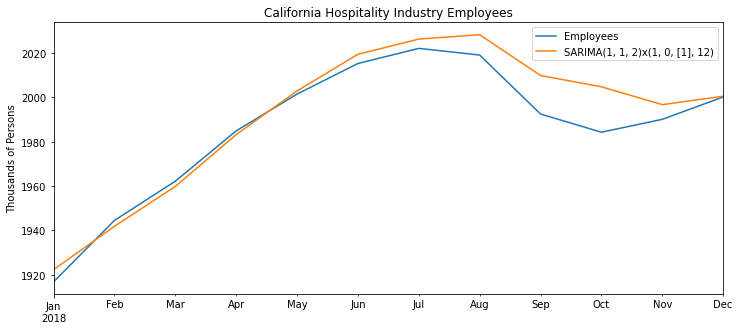

In [38]:
title = 'California Hospitality Industry Employees'
yl = 'Thousands of Persons'
xl = ''

pl = test.Employees.plot(figsize=(12,5), title=title, legend=True)
predictions.plot(legend=True)
pl.autoscale(axis='x', tight=True)
pl.set(xlabel=xl, ylabel=yl)

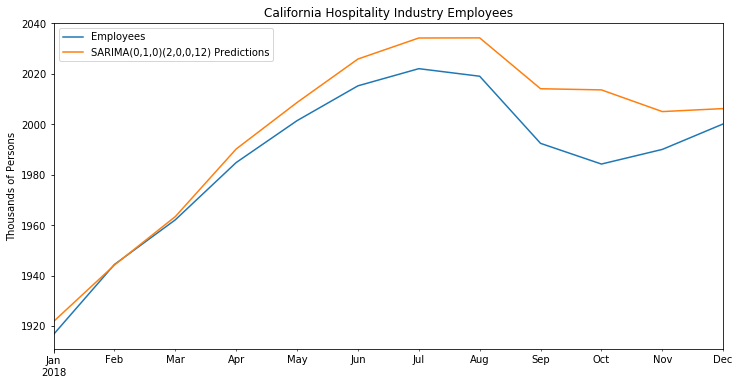

In [8]:
# ваш код

### 8. Оцените качество модели с помощью MSE и RMSE


In [33]:
# Подсказка: используйте функции mean_squared_error и rmse 

print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.64833237
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: 8.811829116


In [42]:
mse_value = mean_squared_error(test.Employees, predictions)
rmse_value = rmse(test.Employees, predictions)
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: {mse_value:11.10}')
print(f'SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error: {rmse_value:11.10}')

SARIMAX(1, 1, 2)x(1, 0, [1], 12) MSE Error: 77.62407889
SARIMAX(1, 1, 2)x(1, 0, [1], 12) RMSE Error:  8.81045282


### 9. Натренируйте модель на полном датасете и предскажите на год вперед

In [44]:
model = SARIMAX(df.Employees, order=(1,1,2), seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/igor/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.80614D+00    |proj g|=  6.97483D+00

At iterate    5    f=  3.81314D+00    |proj g|=  5.08436D-02

At iterate   10    f=  3.27945D+00    |proj g|=  2.33551D-01

At iterate   15    f=  3.18051D+00    |proj g|=  2.98301D-02

At iterate   20    f=  3.15944D+00    |proj g|=  7.75525D-03

At iterate   25    f=  3.15714D+00    |proj g|=  4.63444D-03

At iterate   30    f=  3.15590D+00    |proj g|=  6.26505D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            Employees   No. Observations:                  348
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1098.252
Date:                              Sun, 06 Mar 2022   AIC                           2208.504
Time:                                      18:59:29   BIC                           2231.600
Sample:                                  01-01-1990   HQIC                          2217.700
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9244      0.045     20.520      0.000       0.836       1.013
ma.L1         -0.9440      0.070    -13.571      0.000      -1.080      -0.808
ma.L2          0.1288      0.060      2.164      0.030       0.012       0.245
ar.S.L12       0.9972      0.001    702.665      0.000       0.994       1.000
ma.S.L12      -0.7490      0.043    -17.346      0.000      -0.834      -0.664
sigma2        29.2988      1.717     17.063      0.000      25.933      32.664
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                67.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.11
Prob(H) (two-sided):                  0.40   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
# для прогнозирования используйте с нужными параметрами results.predict() -- см. выше
fcast = results.predict(len(df)-1, len(df)+11, typ='levels').rename('SARIMA(1, 1, 2)x(1, 0, 1, 12) Forecast')

### 10. Постройте график предсказаний и график исходных данных


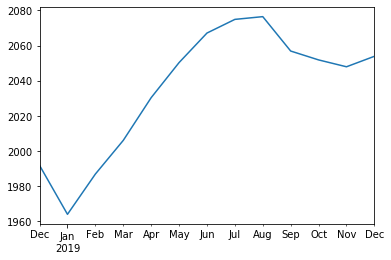

In [ ]:
fcast.plot()

<AxesSubplot:>

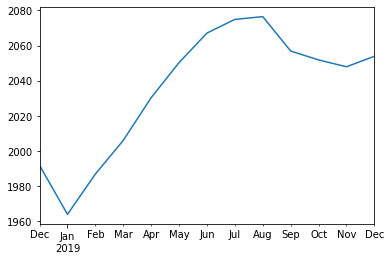

In [74]:
#мой код 
fcast.plot()

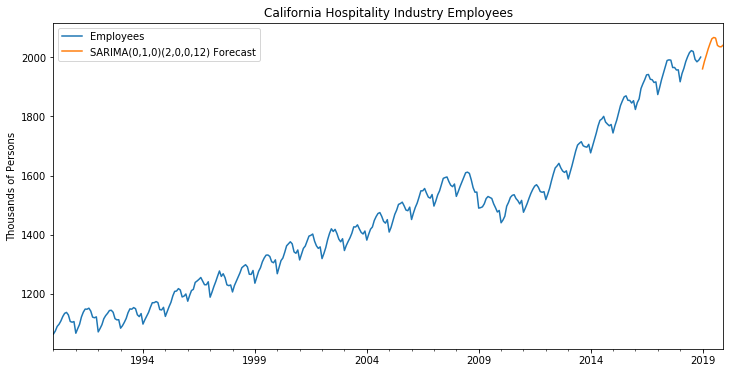

In [11]:
# отобразите общий график

[Text(0.5, 0, ''), Text(0, 0.5, 'Thousands of Persons')]

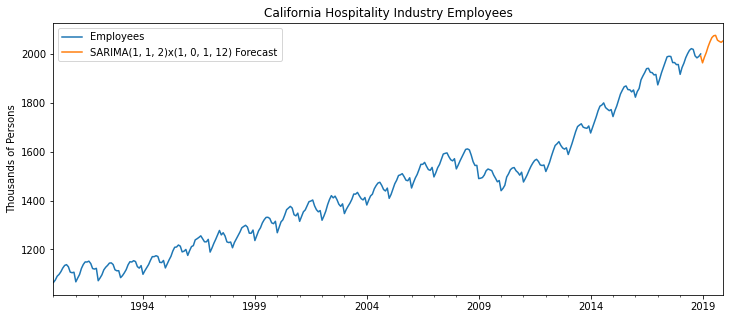

In [75]:
title = 'California Hospitality Industry Employees'
yl = 'Thousands of Persons'
xl = ''

pl = df.Employees.plot(figsize=(12,5), title=title, legend=True)
fcast.plot(legend=True)
pl.autoscale(axis='x', tight=True)
pl.set(xlabel=xl, ylabel=yl)